# Instrumental variables

## Functions and Loops

Go back to the first notebook. Learn how to write functions and loops.

In [1]:
import pandas

In [6]:
fname = "dataset.csv"
df = pandas.read_csv(fname)
display(df.describe())
df


,gdp,date
count,4.000000,4.00000
mean,552.500000,2000.50000
std,519.623261,0.57735
min,100.000000,2000.00000
25%,103.750000,2000.00000
50%,552.500000,2000.50000
75%,1001.250000,2001.00000
max,1005.000000,2001.00000


,country,gdp,date
0,usa,1000,2000
1,usa,1005,2001
2,france,100,2000
3,france,105,2001


In [16]:
def import_and_print(fname, print_statistics=True):
    # here is the body of the function
    df = pandas.read_csv(fname)
    if print_statistics==True:
        display("Summary Statistics")
        display(df.describe())
    return df

In [17]:
import_and_print("dataset.csv")

'Summary Statistics'

,gdp,date
count,4.000000,4.00000
mean,552.500000,2000.50000
std,519.623261,0.57735
min,100.000000,2000.00000
25%,103.750000,2000.00000
50%,552.500000,2000.50000
75%,1001.250000,2001.00000
max,1005.000000,2001.00000


,country,gdp,date
0,usa,1000,2000
1,usa,1005,2001
2,france,100,2000
3,france,105,2001


In [18]:
import_and_print("dataset_2.csv", False)

,country,gdp,date
0,usa,1000,2000
1,usa,1005,2001
2,france,100,2000
3,france,105,2001


In [20]:
def f(x): # no side effect
    return x**2 + 1

In [22]:
import time

In [25]:
def g(x): # that one has side effects
    print("Calculating...")
    time.sleep(10)
    return x**2 + 1

In [24]:
g(1)

Calculating...


2

In [27]:
def h(x): # that one has only side effects
    print("Calculating...")
    time.sleep(10)
    y =  x**2 + 1
    print(f"Found it! {y}")

In [28]:
h(1)

Calculating...
Found it! 2


Documenting code:

- adding comments: `# ...`
- add docstrings: just after the function name, a string explaining what the function does

In [32]:
def import_and_print(fname, print_statistics=True):
    "Import a dataframe from a filename, print the main statistics and return the dataframe."
    
    
    # import the file to get a dataframe
    df = pandas.read_csv(fname)
    
    if print_statistics==True:
        display("Summary Statistics")
        # we print default summary statistics computed by pandas
        display(df.describe())
        
    return df

In [34]:
import_and_print?

Signature: import_and_print(fname, print_statistics=True)
Docstring: Import a dataframe from a filename, print the main statistics and return the dataframe.
File:      ~/Teaching/dbe/session_6/<ipython-input-32-fb18d0d82cec>
Type:      function


In [35]:
def import_and_print(fname, print_statistics=True):
    """Import a dataframe from a filename.
    
    fname (string): filename
    print_statistics (boolean): if True print summary statistics
    
    """
    
    
    # import the file to get a dataframe
    df = pandas.read_csv(fname)
    
    if print_statistics==True:
        display("Summary Statistics")
        # we print default summary statistics computed by pandas
        display(df.describe())
        
    return df

In [36]:
import_and_print?

Signature: import_and_print(fname, print_statistics=True)
Docstring:
Import a dataframe from a filename.

fname (string): filename
print_statistics (boolean): if True print summary statistics
File:      ~/Teaching/dbe/session_6/<ipython-input-35-97c3580f10df>
Type:      function


In [37]:
(lambda x: x**2-1)   (3)

8

In [38]:
f = (lambda x: x**2-1)
f(3)

8

In [40]:
## anonymous functions are useful for the groupby pandas function

In [41]:
df

,country,gdp,date
0,usa,1000,2000
1,usa,1005,2001
2,france,100,2000
3,france,105,2001


In [52]:
# naive approach
l = []
for country in df["country"].unique():
    print(f"Selecting country {country}")
    sel = df["country"]==country
    sdf = df[sel] # sub dataframe with the right country
    print( sdf.mean() )
    l.append(df_s.mean())

Selecting country usa
 gdp     1002.5
 date    2000.5
dtype: float64
Selecting country france
 gdp      102.5
 date    2000.5
dtype: float64


In [61]:
def todo(sdf): print( sdf.mean())

In [62]:
df.groupby("country").apply( todo )

 gdp      102.5
 date    2000.5
dtype: float64
 gdp     1002.5
 date    2000.5
dtype: float64


""


In [63]:
df.groupby("country").apply( lambda sdf: (sdf.mean()) )

,gdp,date
country,,
france,102.5,2000.5
usa,1002.5,2000.5


## Baby example on mock dataset

### Constructing the dataset

Create four random series of length $N=1000$

- $x$: education
- $y$: salary
- $z$: ambition
- $q$: early smoking 

such that:

1. $x$ and $z$ cause $y$
2. $z$ causes $x$
3. $q$ is correlated with $x$, not with $z$

(all relations are linear, add random shocks where needed)

Create a dataset `df`


In [64]:
import numpy

In [128]:
N = 100000

In [129]:
ϵ_z = numpy.random.randn(N)*0.01
ϵ_x = numpy.random.randn(N)*0.01
ϵ_q = numpy.random.randn(N)*0.01
ϵ_y = numpy.random.randn(N)*0.01

In [130]:
z = 0.1 + ϵ_z
x = 0.1 + z + ϵ_x
q = 0.5 + 0.1234*ϵ_x + ϵ_q
y  = 1.0 + 0.9*x + 0.4*z + ϵ_y

In [131]:
df = pandas.DataFrame({
    "x": x,
    "y": y,
    "z": z,
    "q": q
})

In [132]:
df.corr()


,x,y,z,q
x,1.000000,0.831152,0.708497,0.079905
y,0.831152,1.000000,0.694133,0.054070
z,0.708497,0.694133,1.000000,-0.006022
q,0.079905,0.054070,-0.006022,1.000000


### Naive approach

Run a regression to estimate the effect of $x$ on $y$. Control by $z$.
What happens ?

In [133]:
import linearmodels
from statsmodels.formula import api

In [134]:
model = api.ols("y ~ x", df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                 2.234e+05
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:14:59   Log-Likelihood:             3.1488e+05
No. Observations:              100000   AIC:                        -6.298e+05
Df Residuals:                   99998   BIC:                        -6.297e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0005      0.000   2150.251      0.000       1.000       1.001
x              1.0974      0.002    472.679      0.000       1.093       1.102
==============================================================================
Omnibus:                        2.727   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.727
Skew:                           0.008   Prob(JB):                        0.256
Kurtosis:                       3.019   Cond. No.                         73.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
model = api.ols("y ~ x + z", df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 1.243e+05
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:15:00   Log-Likelihood:             3.1862e+05
No. Observations:              100000   AIC:                        -6.372e+05
Df Residuals:                   99997   BIC:                        -6.372e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0007      0.000   2232.389      0.000       1.000       1.002
x              0.8997      0.003    283.880      0.000       0.893       0.906
z              0.3938      0.004     88.054      0.000       0.385       0.403
==============================================================================
Omnibus:                        2.380   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.379
Skew:                           0.007   Prob(JB):                        0.304
Kurtosis:                       3.019   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Instrumental variable

Use $q$ to instrument the effect of x on y. Comment.

In [136]:
# difference between linearmodels and statsmodels:
# linearmodels does not include the constant by defulat

In [137]:
from linearmodels import IV2SLS

In [138]:
from linearmodels import IV2SLS
formula = (
    "y ~ 1 + [x ~ q]"
)
mod = IV2SLS.from_formula(formula, df)
res = mod.fit()
res

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                      y   R-squared:                      0.6670
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6669
No. Observations:              100000   F-statistic:                    883.43
Date:                Wed, Mar 09 2022   P-value (F-stat)                0.0000
Time:                        12:15:00   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      1.0413     0.0060     173.27     0.0000      1.0295      1.0531
x              0.8934     0.0301     29.723     0.0000      0.8345      0.9523
==============================================================================

Endogenous: x
Instruments: q
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7f09adece490

## Return on Education

We follow the excellent R [tutorial](https://www.econometrics-with-r.org/12-6-exercises-10.html) from the (excellent) *Econometrics with R* book.

The goal is to measure the effect of schooling on earnings, while correcting the endogeneity bias by using distance to college as an instrument.

__Download the college distance and make a nice dataframe. Describe the dataset. Plot an histogram of distance.__

https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [1]:
import statsmodels.api as sm

In [6]:
sm.datasets.get_rdataset?

Signature: sm.datasets.get_rdataset(dataname, package='datasets', cache=False)
Docstring:
download and return R dataset

Parameters
----------
dataname : str
    The name of the dataset you want to download
package : str
    The package in which the dataset is found. The default is the core
    'datasets' package.
cache : bool or str
    If True, will download this data into the STATSMODELS_DATA folder.
    The default location is a folder called statsmodels_data in the
    user home folder. Otherwise, you can specify a path to a folder to
    use for caching the data. If False, the data will not be cached.

Returns
-------
dataset : Dataset
    A `statsmodels.data.utils.Dataset` instance. This objects has
    attributes:

    * data - A pandas DataFrame containing the data
    * title - The dataset title
    * package - The package from which the data came
    * from_cache - Whether not cached data was retrieved
    * __doc__ - The verbatim R documentation.

Notes
-----
If the R datas

In [11]:
ds = sm.datasets.get_rdataset("CollegeDistance", "AER")

In [13]:
df = ds.data

In [14]:
ds.title

'College Distance Data'

In [15]:
df.head()

,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
1,male,other,39.150002,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other
2,female,other,48.869999,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
3,male,other,48.740002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
4,male,afam,40.400002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
5,female,other,40.480000,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other


In [17]:
# wage looks constant. Check there is actually some variability
df.describe()

,score,unemp,wage,distance,tuition,education
count,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000
mean,50.889029,7.597215,9.500506,1.802870,0.814608,13.807765
std,8.701910,2.763581,1.343067,2.297128,0.339504,1.789107
min,28.950001,1.400000,6.590000,0.000000,0.257510,12.000000
25%,43.924999,5.900000,8.850000,0.400000,0.484990,12.000000
50%,51.189999,7.100000,9.680000,1.000000,0.824480,13.000000
75%,57.769999,8.900000,10.150000,2.500000,1.127020,16.000000
max,72.809998,24.900000,12.960000,20.000000,1.404160,18.000000


In [18]:
from matplotlib import pyplot as plt

(array([1091.,  923.,  601.,  534.,   92.,  277.,  219.,  126.,  173.,
          36.,  168.,   88.,  126.,   17.,    0.,   43.,   47.,   48.,
          10.,    8.,   19.,    0.,   26.,    0.,    0.,    6.,    4.,
           7.,    0.,    0.,   10.,    0.,    0.,    0.,    0.,    4.,
           0.,   15.,    0.,    0.,   17.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    4.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 <BarContainer object of 50 artists>)

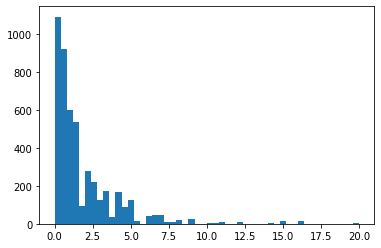

In [22]:
plt.hist(df['distance'], bins=50)

__Run the naive regression $income=\beta_0 + \beta_1 \text{education} + u$__



In [23]:
import statsmodels.formula.api as api

In [25]:
api.ols("C(income) ~ education", df)

ValueError: endog has evaluated to an array with multiple columns that has shape (4739, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [32]:
# education variable takes string values ("high" or "low"). 
# we need to convert them into 1 and 0 first
df['income_binary'] = (df['income'] == "high")*1

In [35]:
model = api.ols("income_binary ~ education", df)
result = model.fit()

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          income_binary   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     239.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.22e-52
Time:                        09:34:48   Log-Likelihood:                -2853.5
No. Observations:                4739   AIC:                             5711.
Df Residuals:                    4737   BIC:                             5724.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4780      0.050     -9.567      0.000      -0.576      -0.380
education      0.0555      0.004     15.460      0.000       0.048       0.063
==============================================================================
Omnibus:                     1510.859   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.036
Skew:                           0.871   Prob(JB):                    2.29e-173
Kurtosis:                       2.003   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value associated to the Fisher statistics is negligible: the model is globally significant. 
Predictive power is very low (R^2 ~ 5%): the effect of education on income is small w.r.t. to the effect of other factors.

Coefficients for interecept and education terms are significant at the 0.1% threshold.

In [38]:
df.head()

,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region,income_binary
1,male,other,39.150002,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other,1
2,female,other,48.869999,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other,0
3,male,other,48.740002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other,0
4,male,afam,40.400002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other,0
5,female,other,40.480000,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other,0


In [40]:
df['ethnicity'].unique()

array(['other', 'afam', 'hispanic'], dtype=object)

__Augment the regression with `unemp`, `hispanic`, `af-am`, `female` and `urban`__

In [46]:
from patsy import Treatment

In [54]:
model = api.ols("income_binary ~ education + C(gender,Treatment(reference='male')) + C(ethnicity,Treatment(reference='other')) + urban + unemp", df)
result = model.fit()

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          income_binary   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     71.34
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           2.00e-85
Time:                        09:51:02   Log-Likelihood:                -2764.9
No. Observations:                4739   AIC:                             5544.
Df Residuals:                    4732   BIC:                             5589.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -0.2433      0.054     -4.528      0.000      -0.349      -0.138
C(gender, Treatment(reference='male'))[T.female]          -0.0490      0.013     -3.861      0.000      -0.074      -0.024
C(ethnicity, Treatment(reference='other'))[T.afam]        -0.1235      0.018     -6.920      0.000      -0.159      -0.089
C(ethnicity, Treatment(reference='other'))[T.hispanic]    -0.1532      0.017     -9.197      0.000      -0.186      -0.121
urban[T.yes]                                              -0.0470      0.015     -3.073      0.002      -0.077      -0.017
education                                                  0.0511      0.004     14.422      0.000       0.044       0.058
unemp                                                     -0.0115      0.002     -5.006      0.000      -0.016      -0.007
==============================================================================
Omnibus:                     1212.294   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.989
Skew:                           0.813   Prob(JB):                    2.71e-152
Kurtosis:                       2.055   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Comment the results and explain the selection problem__

All coefficients are significant at the 1% level. 
Prediction power is higher : R^2 about 8%.

__Explain why distance to college might be used to instrument the effect of schooling.__

We need an instrument that:

- is correlated with schooling: 
    - distance to college affects chances to go to university hence schooling
- independent from other factors (gender, ethnicity, ...)
    
The effect of "distance to college" on income, is only through its effect on education.

__Run an IV regression, where `distance` is used to instrument schooling.__

look at: 
    https://bashtage.github.io/linearmodels/
   (two-stage least squares)

In [ ]:
# remember that linearmodels does not include constants by default
# we take the same formula and add the constant

In [62]:
from linearmodels import IV2SLS
formula = (
"income_binary ~ 1 + [education~distance] + C(gender,Treatment(reference='male')) + C(ethnicity,Treatment(reference='other')) + urban + unemp"
)
mod = IV2SLS.from_formula(formula, df)
res = mod.fit()
res

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:          income_binary   R-squared:                     -0.2734
Estimator:                    IV-2SLS   Adj. R-squared:                -0.2750
No. Observations:                4739   F-statistic:                    213.68
Date:                Tue, Mar 15 2022   P-value (F-stat)                0.0000
Time:                        10:12:51   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                                                   Parameter Estimates                                                    
==========================================================================================================================
                                                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -2.3763     0.5316    -4.4699     0.0000     -3.4182     -1.3343
C(gender, Treatment(reference='male'))[T.female]          -0.0456     0.0150    -3.0301     0.0024     -0.0750     -0.0161
C(ethnicity, Treatment(reference='other'))[T.afam]        -0.0456     0.0283    -1.6123     0.1069     -0.1011      0.0098
C(ethnicity, Treatment(reference='other'))[T.hispanic]    -0.1075     0.0223    -4.8322     0.0000     -0.1511     -0.0639
urban[T.yes]                                              -0.0527     0.0182    -2.8947     0.0038     -0.0884     -0.0170
unemp                                                     -0.0101     0.0027    -3.7771     0.0002     -0.0153     -0.0048
education                                                  0.2032     0.0378     5.3800     0.0000      0.1292      0.2773
==========================================================================================================================

Endogenous: education
Instruments: distance
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x7f3f2323f0d0

__Comment the results. Compare with the R tutorials.__

R^2 is negative, but we can't compare it with the non-IV regression.

All coefficients are significant at the 1% level, save for ethnicity (for category "afam").
With the instrumentation strategy, the effect of education on salary, is 4 times higher than without it.